In [90]:
import string
import os
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pds
import tensorly
tensorly.set_backend('numpy')
from ckine.figures.figureCommon import subplotLabel, getSetup, plot_cells, plot_ligands, plot_values, plot_timepoints
from ckine.Tensor_analysis import reorient_factors, scale_all

Using numpy backend.


In [91]:
fileDir = os.path.dirname(os.path.realpath('__file__'))

factors_filename = os.path.join(fileDir, './ckine/data/factors_results/Sampling.pickle')
factors_filename = os.path.abspath(os.path.realpath(factors_filename))
expr_filename = os.path.join(fileDir, './ckine/data/expr_table.csv')
data = pds.read_csv(expr_filename) # Every column in the data represents a specific cell
cell_names = data.columns.values.tolist()[1::] #returns the cell names from the pandas dataframe (which came from csv)

with open(factors_filename,'rb') as f:
    factors_activity = pickle.load(f)[0]

n_comps = 5
factors = factors_activity[n_comps]
newfactors = reorient_factors(factors)
newfactors = scale_all(newfactors)

In [92]:
scaled_ligand = np.zeros_like(newfactors[2])
for i in range(newfactors[2].shape[1]):
    scale = np.mean(newfactors[2][:,i])
    scaled_ligand[:,i] = newfactors[2][:,i] /scale

for j in range(6):
    print(np.mean(scaled_ligand[:,j]))

0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0


In [93]:
for f in range(4):
    for c in range(6):
        print(np.mean(factors[f][:,c]))

1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999998
1.0
0.9999999999999998
1.0000000000000002
1.0000000000000002
0.11196431518298793
0.07129619510696347
0.09345169350097551
0.049567584266466146
0.046524466128305436
0.025459727943402097
0.9999999999999998
1.0
0.9999999999999998
1.0000000000000002
1.0000000000000002
0.9999999999999998


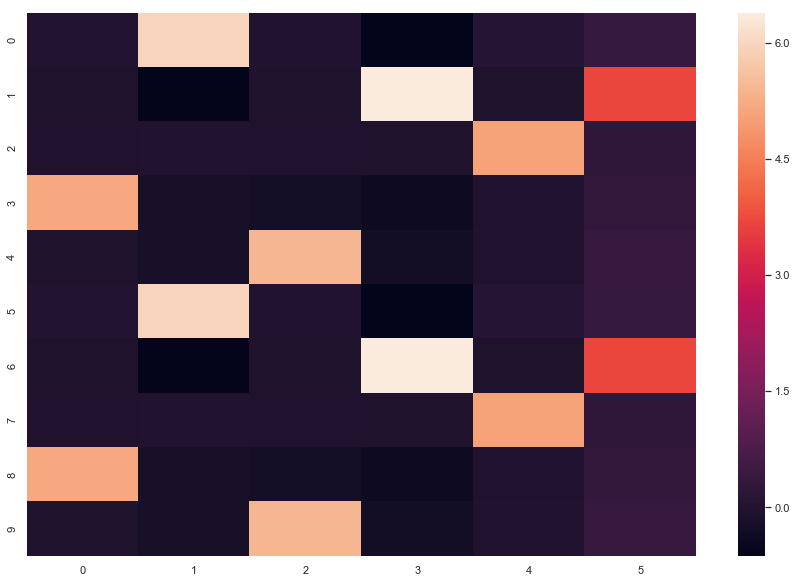

In [105]:
import seaborn as sns; sns.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)
ax = sns.heatmap(newfactors[3])

Combined IL2-15;
IL7;
IL9;
IL4;
IL21;

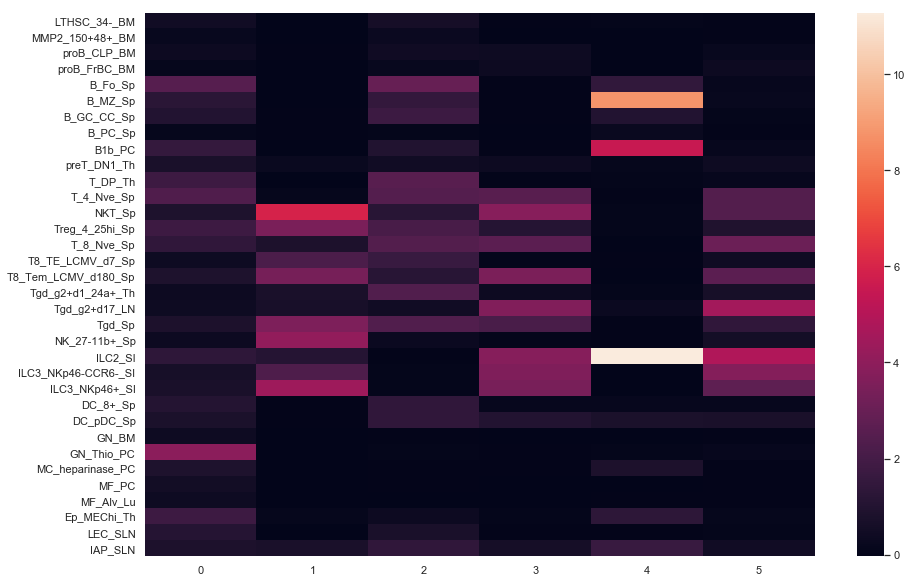

In [106]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)
ax = sns.heatmap(newfactors[1], yticklabels=True)
ax.set_yticklabels(cell_names, rotation = 0);

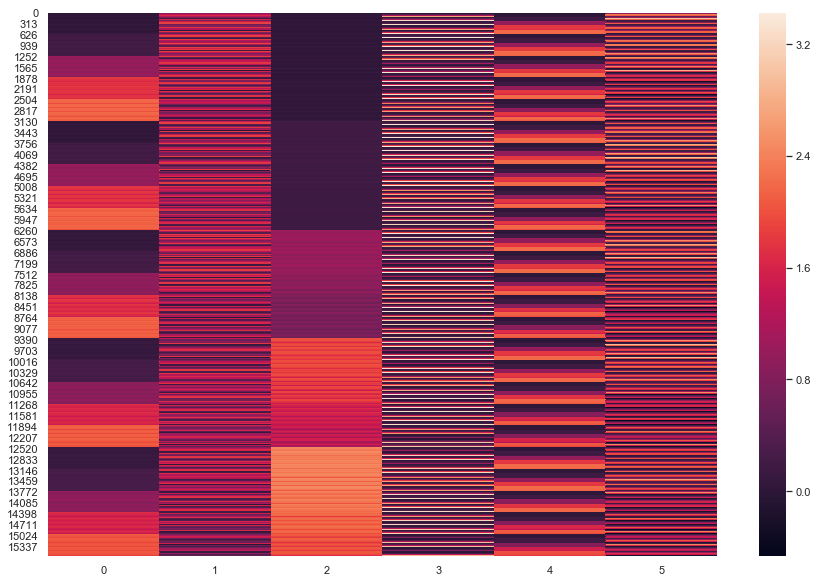

In [107]:
ax = sns.heatmap(scaled_ligand)